### NAME: Kshitij Chilate
### DATE: 25/12/2025
### MACHINE LEARNING 

### Aim: To study and apply Data Preprocessing techniques on given dataset. Prepare a titanic dataset for training with machine learning algorithm by applying suitable data preprocessing techniques. • Perform basic EDA using functions like head(), tail(), describe(), shape. • Identify & handle missing value. • Check for duplicates and handle it. • Identify outliers & handle it. • Apply data encoding technique on suitable attribute. • Apply Univariate, Bivariate & Multivariate analysis • Apply feature scaling technique on suitable attribute. • Split the dataset in the ratio of 80:20

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [81]:
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv("Titanic-Dataset.csv")

In [83]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [85]:
df.shape

(891, 12)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
df.isnull().sum()                  #identify to extrapolet

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [90]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [91]:
df.drop_duplicates(inplace=True)

In [92]:
df.reset_index(drop=True, inplace=True)

In [93]:
df.shape

(891, 12)

In [94]:
median=df["Age"].median()

In [95]:
df["Age"]=df['Age'].fillna(df["Age"].median())

In [96]:
df["Embarked"] = df["Embarked"].fillna(str(df["Embarked"].mode()))


In [97]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

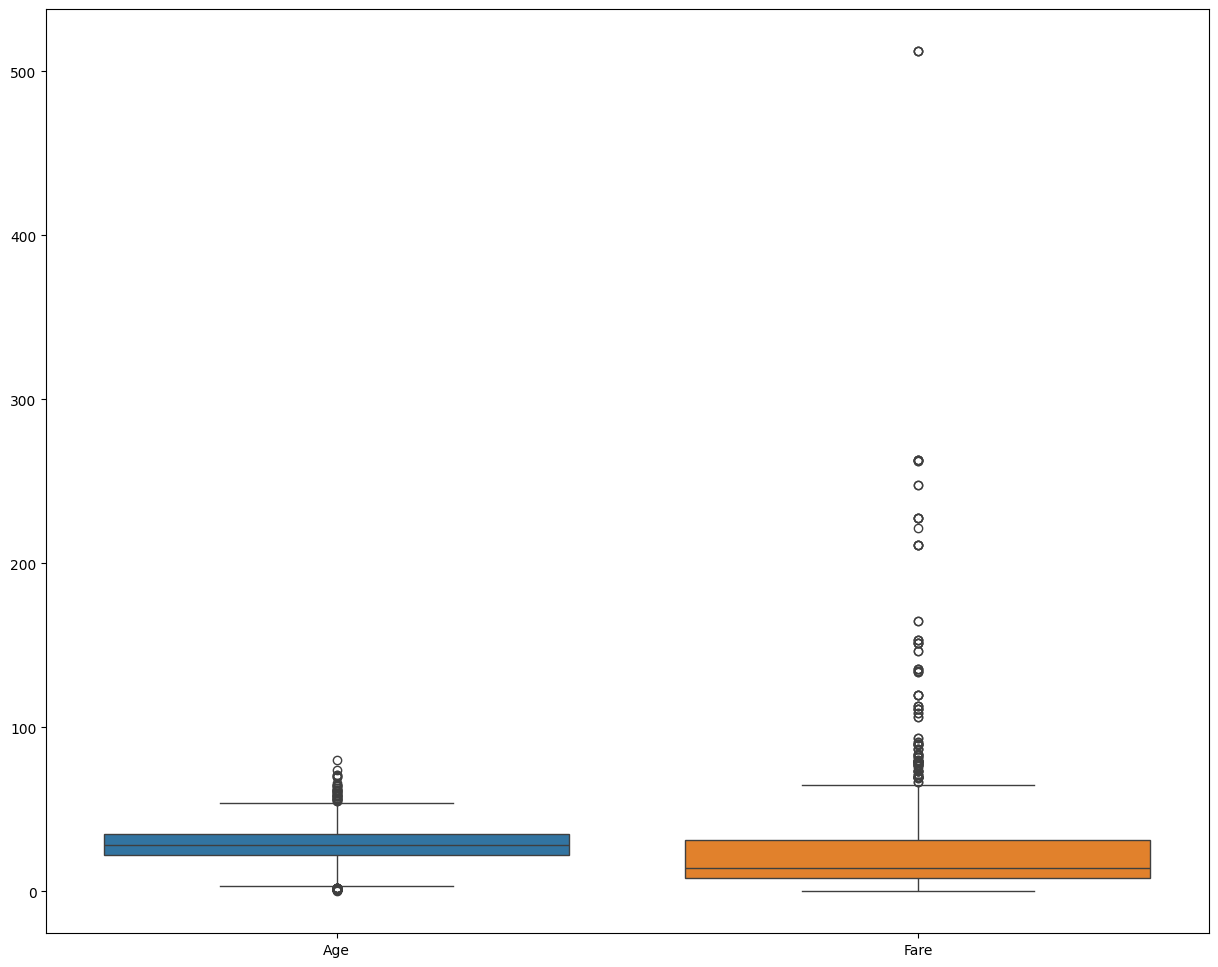

In [98]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[["Age","Fare"]])

In [99]:
def detect_outliers_iqr(data):
    outlier_list=[]
    data = sorted(data)

    q1=np.percentile(data,25)
    q3=np.percentile(data,75)

    IQR=q3-q1

    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list

for i in ['Age','Fare']:
    outliers=detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute:",outliers)

Outliers in Age attribute: [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
Outliers in Fare attribute: [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 120.

<Axes: >

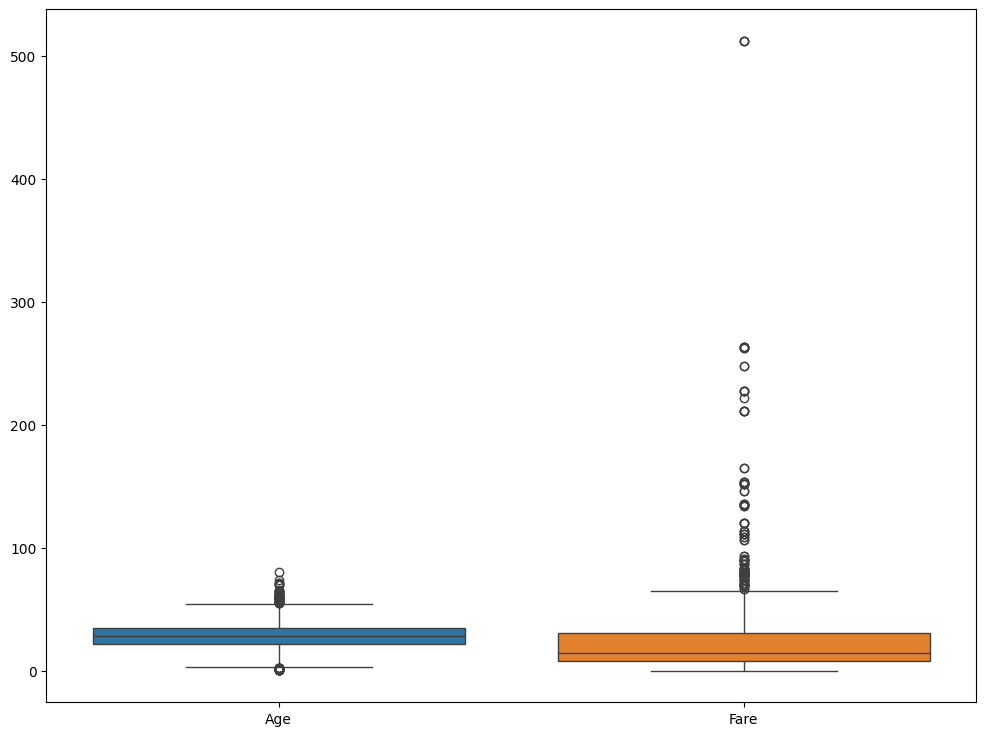

In [100]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df[["Age","Fare"]])

In [101]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [102]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [103]:
df["Sex"]= df["Sex"].replace("male",0)

In [104]:
df["Sex"]= df["Sex"].replace("female",1)

In [105]:
df["Embarked"].unique()

array(['S', 'C', 'Q', '0    S\nName: Embarked, dtype: object'],
      dtype=object)

In [106]:
df["Embarked"]= df["Embarked"].replace("S",0)

In [107]:
df["Embarked"]= df["Embarked"].replace("C",1)

In [108]:
df["Embarked"]= df["Embarked"].replace("Q",2)

In [109]:
df["Embarked"]= df["Embarked"].replace("S\ndtype:object",3)

In [110]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [111]:
gender = round(df["Sex"].value_counts().values[0]/891*100)

In [112]:

print("out of 891 {} % passengers are male ".format(gender))

out of 891 65 % passengers are male 


<Axes: ylabel='count'>

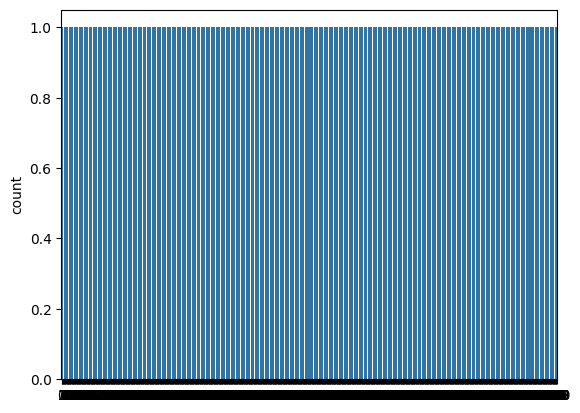

In [113]:

sns.countplot(df["Fare"])

In [114]:
no_fare = round(df["Fare"].value_counts().values[0]/891*100)
fare = round(df["Fare"].value_counts().values[1] + df["Fare"].value_counts().values[2])

In [115]:

print(f"Out of 891 {fare}%")
print(f"Out of 891 {no_fare}%")

Out of 891 80%
Out of 891 5%


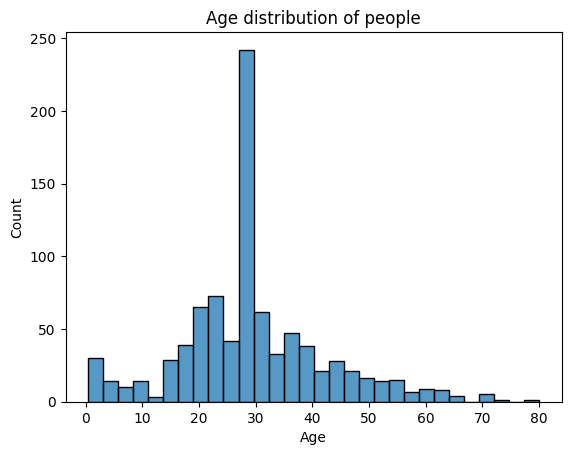

In [116]:
sns.histplot(df.Age)
plt.title("Age distribution of people")
plt.show()